In [28]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Dense
import tensorflow.keras as keras

Загрузка датасета

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(X_train.shape)
print(X_test.shape)

170500096/170498071 [==============================] - 6s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
# нормализация данных [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# трансформация лейблов в one-hot encoding
y_train = to_categorical(y_train, 10) 
y_test = to_categorical(y_test, 10) 

Базовая модель: 3 свертки по убыванию: 5х5, 4х4, 3х3

In [5]:
from tensorflow.keras.models import Model 
# инициализация пустой модели
model = Sequential()
# первый сверточный слой
model.add(layers.Conv2D(2, (5, 5), strides=(1, 1),
                        activation='relu',
                        input_shape=(32, 32, 3),
                        padding="valid"))
# второй пуллинговый слой
model.add(layers.AveragePooling2D(pool_size=(2, 2),
                                  strides=(1, 1),
                                  padding='same'))
# третий сверточный слой
model.add(layers.Conv2D(4, (4, 4), strides=(1, 1),
                        activation='relu',
                        padding='same'))

# четвертый пуллинговый слой
model.add(layers.AveragePooling2D(pool_size=(2, 2),
                                  strides=(2, 2),
                                  padding='same'))
# пятый сверточный слой
model.add(layers.Conv2D(8, (3, 3), strides=(1, 1),
                        activation='sigmoid',
                        padding='valid'))

# шестой пуллинговый слой
model.add(layers.MaxPooling2D(pool_size=(2, 2),
                                  strides=(2, 2),
                                  padding='same'))
# сглаживание CNN выхода чтобы можно было его присоединить к полносвязному слою
model.add(layers.Flatten())

# полносвязный слой
model.add(layers.Dense(72, activation='relu'))
# полносвязный слой
model.add(layers.Dense(32, activation='relu'))
# выходной слой с функцией активации softmax
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 2)         152       
_________________________________________________________________
average_pooling2d (AveragePo (None, 28, 28, 2)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 4)         132       
_________________________________________________________________
average_pooling2d_1 (Average (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 8)         296       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 6, 6, 8)           0         
_________________________________________________________________
flatten (Flatten)            (None, 288)               0

In [17]:
# компиляция модели
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=["accuracy"])


hist = model.fit(X_train, y_train,
                 epochs=5,
                 batch_size=256,
                 validation_data=(X_test, y_test),
                 verbose=1)

Epoch 1/5
196/196 [==============================] - 37s 187ms/step - loss: 2.3089 - accuracy: 0.0979 - val_loss: 2.2902 - val_accuracy: 0.1300
Epoch 2/5
196/196 [==============================] - 36s 184ms/step - loss: 2.1935 - accuracy: 0.1794 - val_loss: 1.9119 - val_accuracy: 0.2947
Epoch 3/5
196/196 [==============================] - 36s 186ms/step - loss: 1.8873 - accuracy: 0.3022 - val_loss: 1.8041 - val_accuracy: 0.3334
Epoch 4/5
196/196 [==============================] - 36s 184ms/step - loss: 1.7894 - accuracy: 0.3408 - val_loss: 1.7823 - val_accuracy: 0.3471
Epoch 5/5
196/196 [==============================] - 36s 185ms/step - loss: 1.7483 - accuracy: 0.3529 - val_loss: 1.7259 - val_accuracy: 0.3689


In [18]:
test_loss, test_metric = model.evaluate(X_test, y_test)
print(f"Test loss {test_loss:.4f}, accuracy {test_metric:.2f}%")

313/313 [==============================] - 4s 12ms/step - loss: 1.7259 - accuracy: 0.3689
Test loss 1.7259, accuracy 0.37%


Добавим фильтров: 4, 8, 16 соответственно

In [7]:
from tensorflow.keras.models import Model 
# инициализация пустой модели
model2 = Sequential()
# первый сверточный слой
model2.add(layers.Conv2D(4, (5, 5), strides=(1, 1),
                        activation='relu',
                        input_shape=(32, 32, 3),
                        padding="valid"))
# второй пуллинговый слой
model2.add(layers.AveragePooling2D(pool_size=(2, 2),
                                  strides=(1, 1),
                                  padding='same'))
# третий сверточный слой
model2.add(layers.Conv2D(8, (4, 4), strides=(1, 1),
                        activation='relu',
                        padding='same'))

# четвертый пуллинговый слой
model2.add(layers.AveragePooling2D(pool_size=(2, 2),
                                  strides=(2, 2),
                                  padding='same'))
# пятый сверточный слой
model2.add(layers.Conv2D(16, (3, 3), strides=(1, 1),
                        activation='sigmoid',
                        padding='valid'))

# шестой пуллинговый слой
model2.add(layers.MaxPooling2D(pool_size=(2, 2),
                                  strides=(2, 2),
                                  padding='same'))
# сглаживание CNN выхода чтобы можно было его присоединить к полносвязному слою
model2.add(layers.Flatten())

# полносвязный слой
model2.add(layers.Dense(128, activation='relu'))
# полносвязный слой
model2.add(layers.Dense(32, activation='relu'))
# выходной слой с функцией активации softmax
model2.add(layers.Dense(10, activation='softmax'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 4)         304       
_________________________________________________________________
average_pooling2d_2 (Average (None, 28, 28, 4)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 8)         520       
_________________________________________________________________
average_pooling2d_3 (Average (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)              

In [8]:
# компиляция модели
model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=["accuracy"])


hist2 = model2.fit(X_train, y_train,
                 epochs=5,
                 batch_size=256,
                 validation_data=(X_test, y_test),
                 verbose=1)

Epoch 1/5
196/196 [==============================] - 40s 200ms/step - loss: 2.2435 - accuracy: 0.1496 - val_loss: 1.9732 - val_accuracy: 0.2677
Epoch 2/5
196/196 [==============================] - 39s 200ms/step - loss: 1.9143 - accuracy: 0.2859 - val_loss: 1.7303 - val_accuracy: 0.3639
Epoch 3/5
196/196 [==============================] - 39s 201ms/step - loss: 1.7051 - accuracy: 0.3687 - val_loss: 1.6249 - val_accuracy: 0.4044
Epoch 4/5
196/196 [==============================] - 39s 198ms/step - loss: 1.6061 - accuracy: 0.4102 - val_loss: 1.5394 - val_accuracy: 0.4312
Epoch 5/5
196/196 [==============================] - 39s 199ms/step - loss: 1.5367 - accuracy: 0.4381 - val_loss: 1.5027 - val_accuracy: 0.4474


In [19]:
test_loss2, test_metric2 = model2.evaluate(X_test, y_test)
print(f"Test loss {test_loss2:.4f}, accuracy {test_metric2:.2f}%")

313/313 [==============================] - 4s 12ms/step - loss: 1.5027 - accuracy: 0.4474
Test loss 1.5027, accuracy 0.45%


In [10]:
y_pred = model2.predict(X_test)

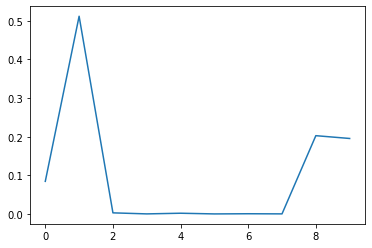

[8.4409781e-02 5.1181537e-01 2.8535186e-03 1.6340132e-04 1.8733018e-03
 9.7324271e-05 5.4620189e-04 2.0338358e-04 2.0264883e-01 1.9538887e-01]


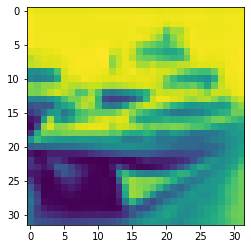

In [11]:
import matplotlib.pyplot as plt
plt.plot(y_pred[1][:])
plt.show()
print(y_pred[1][:])
plt.imshow(X_test[1][:,:,0])
plt.show()

Качество выросло с 37 до 45%.
Добавим еще фильтров: 8, 16, 32

In [12]:
# инициализация пустой модели
model3 = Sequential()
# первый сверточный слой
model3.add(layers.Conv2D(8, (5, 5), strides=(1, 1),
                        activation='relu',
                        input_shape=(32, 32, 3),
                        padding="valid"))
# второй пуллинговый слой
model3.add(layers.AveragePooling2D(pool_size=(2, 2),
                                  strides=(1, 1),
                                  padding='same'))
# третий сверточный слой
model3.add(layers.Conv2D(16, (4, 4), strides=(1, 1),
                        activation='relu',
                        padding='same'))

# четвертый пуллинговый слой
model3.add(layers.AveragePooling2D(pool_size=(2, 2),
                                  strides=(2, 2),
                                  padding='same'))
# пятый сверточный слой
model3.add(layers.Conv2D(32, (3, 3), strides=(1, 1),
                        activation='sigmoid',
                        padding='valid'))

# шестой пуллинговый слой
model3.add(layers.MaxPooling2D(pool_size=(2, 2),
                                  strides=(2, 2),
                                  padding='same'))
# сглаживание CNN выхода чтобы можно было его присоединить к полносвязному слою
model3.add(layers.Flatten())

# полносвязный слой
model3.add(layers.Dense(256, activation='relu'))
# полносвязный слой
model3.add(layers.Dense(64, activation='relu'))
# выходной слой с функцией активации softmax
model3.add(layers.Dense(10, activation='softmax'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 8)         608       
_________________________________________________________________
average_pooling2d_4 (Average (None, 28, 28, 8)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 16)        2064      
_________________________________________________________________
average_pooling2d_5 (Average (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)             

In [13]:
# компиляция модели
model3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=["accuracy"])


hist3 = model3.fit(X_train, y_train,
                 epochs=5,
                 batch_size=256,
                 validation_data=(X_test, y_test),
                 verbose=1)

Epoch 1/5
196/196 [==============================] - 52s 261ms/step - loss: 2.1735 - accuracy: 0.1812 - val_loss: 1.7124 - val_accuracy: 0.3789
Epoch 2/5
196/196 [==============================] - 51s 262ms/step - loss: 1.6923 - accuracy: 0.3812 - val_loss: 1.5698 - val_accuracy: 0.4264
Epoch 3/5
196/196 [==============================] - 52s 266ms/step - loss: 1.5768 - accuracy: 0.4216 - val_loss: 1.5568 - val_accuracy: 0.4324
Epoch 4/5
196/196 [==============================] - 52s 264ms/step - loss: 1.5140 - accuracy: 0.4492 - val_loss: 1.4941 - val_accuracy: 0.4519
Epoch 5/5
196/196 [==============================] - 51s 263ms/step - loss: 1.4446 - accuracy: 0.4746 - val_loss: 1.4001 - val_accuracy: 0.4917


In [14]:
test_loss3, test_metric3 = model3.evaluate(X_test, y_test)
print(f"Test loss {test_loss3:.4f}, accuracy {test_metric3:.2f}%")

313/313 [==============================] - 4s 13ms/step - loss: 1.4001 - accuracy: 0.4917
Test loss 1.4001, accuracy 0.49%


Качество выросло до 49%

3 Увеличим глубину сети (от базовой модели) не меняя количество каналов

In [21]:
# инициализация пустой модели
model11 = Sequential()
# первый сверточный слой
model11.add(layers.Conv2D(2, (5, 5), strides=(1, 1),
                        activation='relu',
                        input_shape=(32, 32, 3),
                        padding="valid"))
# второй пуллинговый слой
model11.add(layers.AveragePooling2D(pool_size=(2, 2),
                                  strides=(1, 1),
                                  padding='same'))
# третий сверточный слой
model11.add(layers.Conv2D(4, (4, 4), strides=(1, 1),
                        activation='relu',
                        padding='same'))

# четвертый пуллинговый слой
model11.add(layers.AveragePooling2D(pool_size=(2, 2),
                                  strides=(2, 2),
                                  padding='same'))
# пятый сверточный слой
model11.add(layers.Conv2D(4, (4, 4), strides=(1, 1),
                        activation='relu',
                        padding='same'))

# шестой пуллинговый слой
model11.add(layers.AveragePooling2D(pool_size=(1, 1),
                                  strides=(1, 1),
                                  padding='same'))
# сельмой сверточный слой
model11.add(layers.Conv2D(8, (3, 3), strides=(1, 1),
                        activation='sigmoid',
                        padding='valid'))

# восьмой пуллинговый слой
model11.add(layers.MaxPooling2D(pool_size=(2, 2),
                                  strides=(2, 2),
                                  padding='same'))
# сглаживание CNN выхода чтобы можно было его присоединить к полносвязному слою
model11.add(layers.Flatten())

# полносвязный слой
model11.add(layers.Dense(72, activation='relu'))
# полносвязный слой
model11.add(layers.Dense(32, activation='relu'))
# выходной слой с функцией активации softmax
model11.add(layers.Dense(10, activation='softmax'))
model11.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 28, 28, 2)         152       
_________________________________________________________________
average_pooling2d_12 (Averag (None, 28, 28, 2)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 28, 28, 4)         132       
_________________________________________________________________
average_pooling2d_13 (Averag (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 4)         260       
_________________________________________________________________
average_pooling2d_14 (Averag (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 12, 12, 8)        

In [22]:
# компиляция модели
model11.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=["accuracy"])


hist11 = model11.fit(X_train, y_train,
                 epochs=5,
                 batch_size=256,
                 validation_data=(X_test, y_test),
                 verbose=1)

Epoch 1/5
196/196 [==============================] - 39s 194ms/step - loss: 2.2788 - accuracy: 0.1226 - val_loss: 2.0132 - val_accuracy: 0.2394
Epoch 2/5
196/196 [==============================] - 38s 192ms/step - loss: 1.9882 - accuracy: 0.2504 - val_loss: 1.9371 - val_accuracy: 0.2744
Epoch 3/5
196/196 [==============================] - 38s 194ms/step - loss: 1.8939 - accuracy: 0.2906 - val_loss: 1.8209 - val_accuracy: 0.3190
Epoch 4/5
196/196 [==============================] - 38s 194ms/step - loss: 1.8086 - accuracy: 0.3242 - val_loss: 1.7451 - val_accuracy: 0.3554
Epoch 5/5
196/196 [==============================] - 38s 195ms/step - loss: 1.7463 - accuracy: 0.3559 - val_loss: 1.6880 - val_accuracy: 0.3786


In [24]:
test_loss11, test_metric11 = model11.evaluate(X_test, y_test)
print(f"Test loss {test_loss11:.4f}, accuracy {test_metric11:.2f}%")

313/313 [==============================] - 4s 12ms/step - loss: 1.6880 - accuracy: 0.3786
Test loss 1.6880, accuracy 0.38%


Метрика выросла незначительно (с 37 до 38%). Добавим еще 1 слой свертка + пуллинг

In [25]:
# инициализация пустой модели
model12 = Sequential()
# первый сверточный слой
model12.add(layers.Conv2D(2, (5, 5), strides=(1, 1),
                        activation='relu',
                        input_shape=(32, 32, 3),
                        padding="valid"))
# второй пуллинговый слой
model12.add(layers.AveragePooling2D(pool_size=(2, 2),
                                  strides=(1, 1),
                                  padding='same'))
# третий сверточный слой
model12.add(layers.Conv2D(4, (4, 4), strides=(1, 1),
                        activation='relu',
                        padding='same'))

# четвертый пуллинговый слой
model12.add(layers.AveragePooling2D(pool_size=(2, 2),
                                  strides=(2, 2),
                                  padding='same'))
# пятый сверточный слой
model12.add(layers.Conv2D(4, (4, 4), strides=(1, 1),
                        activation='relu',
                        padding='same'))

# шестой пуллинговый слой
model12.add(layers.AveragePooling2D(pool_size=(1, 1),
                                  strides=(1, 1),
                                  padding='same'))
# сельмой сверточный слой
model12.add(layers.Conv2D(8, (3, 3), strides=(1, 1),
                        activation='sigmoid',
                        padding='valid'))

# восьмой пуллинговый слой
model12.add(layers.MaxPooling2D(pool_size=(2, 2),
                                  strides=(2, 2),
                                  padding='same'))
# девятый сверточный слой
model12.add(layers.Conv2D(8, (3, 3), strides=(1, 1),
                        activation='sigmoid',
                        padding='same'))

# десятый пуллинговый слой
model12.add(layers.MaxPooling2D(pool_size=(1, 1),
                                  strides=(1, 1),
                                  padding='same'))
# сглаживание CNN выхода чтобы можно было его присоединить к полносвязному слою
model12.add(layers.Flatten())

# полносвязный слой
model12.add(layers.Dense(72, activation='relu'))
# полносвязный слой
model12.add(layers.Dense(32, activation='relu'))
# выходной слой с функцией активации softmax
model12.add(layers.Dense(10, activation='softmax'))
model12.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 28, 28, 2)         152       
_________________________________________________________________
average_pooling2d_15 (Averag (None, 28, 28, 2)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 28, 28, 4)         132       
_________________________________________________________________
average_pooling2d_16 (Averag (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 14, 14, 4)         260       
_________________________________________________________________
average_pooling2d_17 (Averag (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 12, 12, 8)        

In [26]:
# компиляция модели
model12.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=["accuracy"])


hist12 = model12.fit(X_train, y_train,
                 epochs=5,
                 batch_size=256,
                 validation_data=(X_test, y_test),
                 verbose=1)

Epoch 1/5
196/196 [==============================] - 43s 215ms/step - loss: 2.2910 - accuracy: 0.1100 - val_loss: 2.1203 - val_accuracy: 0.2051
Epoch 2/5
196/196 [==============================] - 40s 206ms/step - loss: 2.0339 - accuracy: 0.2420 - val_loss: 1.8435 - val_accuracy: 0.3241
Epoch 3/5
196/196 [==============================] - 41s 208ms/step - loss: 1.8318 - accuracy: 0.3266 - val_loss: 1.8095 - val_accuracy: 0.3381
Epoch 4/5
196/196 [==============================] - 40s 205ms/step - loss: 1.7835 - accuracy: 0.3453 - val_loss: 1.7495 - val_accuracy: 0.3624
Epoch 5/5
196/196 [==============================] - 40s 206ms/step - loss: 1.7458 - accuracy: 0.3620 - val_loss: 1.7417 - val_accuracy: 0.3667


In [27]:
test_loss12, test_metric12 = model12.evaluate(X_test, y_test)
print(f"Test loss {test_loss12:.4f}, accuracy {test_metric12:.2f}%")

313/313 [==============================] - 4s 13ms/step - loss: 1.7417 - accuracy: 0.3667
Test loss 1.7417, accuracy 0.37%


Метрика упала (даже немного ниже базовой). 36.67%
Скорее всего, это связано с затуханием градиента при увеличении глубины сети.

Задание 4*. Создадим полносвязную сеть в которой количество нейронов соответствует количеству каналов базовой модели. (Полагаю это эквивалентно). А последние слои одинаковые у базовой и текущей модели

In [41]:
# инициализация пустой модели
model13 = Sequential()
# input
# первый сверточный слой
# Dense
model13.add(layers.Flatten(input_shape=(32,32,3)))
model13.add(Dense(2, activation='relu'))
model13.add(Dense(4, activation='relu'))
model13.add(Dense(8, activation='sigmoid'))
# полносвязный слой
model13.add(layers.Dense(72, activation='relu'))
# полносвязный слой
model13.add(layers.Dense(32, activation='relu'))
# выходной слой с функцией активации softmax
model13.add(layers.Dense(10, activation='softmax'))
model13.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_57 (Dense)             (None, 2)                 6146      
_________________________________________________________________
dense_58 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_59 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_60 (Dense)             (None, 72)                648       
_________________________________________________________________
dense_61 (Dense)             (None, 32)                2336      
_________________________________________________________________
dense_62 (Dense)             (None, 10)              

In [42]:
# компиляция модели
model13.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=["accuracy"])


hist13 = model13.fit(X_train, y_train,
                 epochs=5,
                 batch_size=256,
                 validation_data=(X_test, y_test),
                 verbose=1)

Epoch 1/5
196/196 [==============================] - 2s 8ms/step - loss: 2.2659 - accuracy: 0.1339 - val_loss: 2.0661 - val_accuracy: 0.1868
Epoch 2/5
196/196 [==============================] - 1s 7ms/step - loss: 2.0588 - accuracy: 0.1926 - val_loss: 2.0415 - val_accuracy: 0.1886
Epoch 3/5
196/196 [==============================] - 1s 7ms/step - loss: 2.0465 - accuracy: 0.1908 - val_loss: 2.0355 - val_accuracy: 0.2002
Epoch 4/5
196/196 [==============================] - 1s 7ms/step - loss: 2.0388 - accuracy: 0.2036 - val_loss: 2.0297 - val_accuracy: 0.2044
Epoch 5/5
196/196 [==============================] - 1s 7ms/step - loss: 2.0299 - accuracy: 0.2039 - val_loss: 2.0232 - val_accuracy: 0.2045


In [43]:
test_loss13, test_metric13 = model13.evaluate(X_test, y_test)
print(f"Test loss {test_loss13:.4f}, accuracy {test_metric13:.2f}%")

313/313 [==============================] - 0s 898us/step - loss: 2.0232 - accuracy: 0.2045
Test loss 2.0232, accuracy 0.20%


Полносвязная сеть обучается быстрее при сопоставимых параметрах, однако метрика значительно хуже: 20% против 37%